In [1]:
import pandas as pd
import numpy as np
from nltk.corpus import wordnet as wn
import csv
import json

In [2]:
data={"users":[]}
with open('DATA.json', 'w') as outfile:
    json.dump(data, outfile)

In [3]:
def write_json(new_data, filename='DATA.json'):
    with open(filename,'r+') as file:
        #load existing data into a dict.
        file_data = json.load(file)
        #join new_data with file_data inside emp_details
        file_data["users"].append(new_data)
        #sets file's current position at offset.
        file.seek(0)
        #convert back to json.
        json.dump(file_data, file, indent = 4)


In [4]:
df_tr=pd.read_csv('Training.csv')

In [5]:
df_tr.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [6]:
df_tr.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df_tr.shape

(4920, 133)

In [8]:
df_tr.iloc[-1]

itching                        0
skin_rash                      1
nodal_skin_eruptions           0
continuous_sneezing            0
shivering                      0
                          ...   
inflammatory_nails             0
blister                        1
red_sore_around_nose           1
yellow_crust_ooze              1
prognosis               Impetigo
Name: 4919, Length: 133, dtype: object

In [9]:
df_tt=pd.read_csv('Testing.csv')

In [10]:
df_tt.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [11]:
df_tt.shape

(41, 133)

In [12]:
symp=[]
disease=[]
for i in range(len(df_tr)):
    symp.append(df_tr.columns[df_tr.iloc[i]==1].to_list())
    disease.append(df_tr.iloc[i,-1])

In [13]:
symp[0]

['itching', 'skin_rash', 'nodal_skin_eruptions', 'dischromic _patches']

In [14]:
disease[50]

'Peptic ulcer diseae'

#I. Get Symptoms

In [15]:
#removing unnecessary charcaters to clean symptom names
all_symp_col=list(df_tr.columns[:-1])
def clean_symp(sym):
    return sym.replace('_',' ').replace('.1','').replace('(typhos)','').replace('yellowish','yellow').replace('yellowing','yellow')

In [16]:
all_symp=[clean_symp(sym) for sym in (all_symp_col)]

In [17]:
#get all symptoms which do not have a synset
import nltk
nltk.download('wordnet')

ohne_syns=[] #list to store symptoms without sysnets
mit_syns=[] #list to store symptoms with sysnets

#iterate symptoms list to check each symptom whether there are Wordnet sysnet associated with it
for sym in all_symp:
    if not wn.synsets(sym) :
        ohne_syns.append(sym)
    else:
        mit_syns.append(sym)

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [18]:
len(mit_syns)

33

In [19]:
len(ohne_syns)

99

# II. Preprocess text

In [20]:
from spacy.lang.en.stop_words import STOP_WORDS
import spacy
nlp = spacy.load('en_core_web_sm')

In [21]:
def preprocess(doc):
    #processesusing the spaCy model
    nlp_doc=nlp(doc)
    d=[]
    for token in nlp_doc:
        #checks if the lowercase form of the token isnot in the set of stop words and if the token consists of alphabetic characters
        if(not token.text.lower()  in STOP_WORDS and  token.text.isalpha()):
            #append the lowercase lemma of the token to the list
            d.append(token.lemma_.lower() )
    return ' '.join(d)

In [22]:
def preprocess_sym(doc):
    nlp_doc=nlp(doc)
    d=[]
    for token in nlp_doc:
        if(not token.text.lower()  in STOP_WORDS and  token.text.isalpha()):
            d.append(token.lemma_.lower() )
    return ' '.join(d)

In [23]:
preprocess("skin peeling")

'skin peel'

In [24]:
all_symp_pr=[preprocess_sym(sym) for sym in all_symp]

In [25]:
col_dict = dict(zip(all_symp_pr, all_symp_col))

# III. Syntactic Similarity

In [26]:
def jaccard_set(str1, str2):
    list1=str1.split(' ')
    list2=str2.split(' ')
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(list1) + len(list2)) - intersection
    return float(intersection) / union

In [27]:
def syntactic_similarity(symp_t, corpus):
    most_sim = []
    poss_sym = []
    for symp in corpus:
        d = jaccard_set(symp_t, symp)
        most_sim.append(d)
    order = np.argsort(most_sim)[::-1].tolist()
    for i in order:
        if DoesExist(symp_t):
            return 1, [corpus[i]]
        if corpus[i] not in poss_sym and most_sim[i] != 0:
            poss_sym.append(corpus[i])
    if len(poss_sym):
        return 1, poss_sym
    else:
        return 0, None

In [28]:
import itertools
def powerset(seq):
    if len(seq) <= 1:
        yield seq
        yield []
    else:
        for item in powerset(seq[1:]):
            yield [seq[0]]+item
            yield item

In [29]:
def sort(a):
    for i in range(len(a)):
        for j in range(i+1,len(a)):
            if len(a[j])>len(a[i]):
                a[i],a[j]=a[j],a[i]
    a.pop()
    return a

In [30]:
def permutations(s):
    permutations = list(itertools.permutations(s))
    return([' '.join(permutation) for permutation in permutations])

In [31]:
def DoesExist(txt):
    txt=txt.split(' ')
    combinations = [x for x in powerset(txt)]
    sort(combinations)
    for comb in combinations :
        for sym in permutations(comb):
            if sym in all_symp_pr:
                return sym
    return False

In [32]:
DoesExist('worried')

False

In [33]:
preprocess('really worried')

'worried'

In [34]:
syntactic_similarity(preprocess('nervous') ,all_symp_pr)

(0, None)

In [35]:
def check_pattern(inp,dis_list):
    import re
    pred_list=[]
    ptr=0
    patt = "^" + inp + "$"
    regexp = re.compile(inp)
    for item in dis_list:
        if regexp.search(item):
            pred_list.append(item)
    if(len(pred_list)>0):
        return 1,pred_list
    else:
        return ptr,None

In [36]:
check_pattern('nail',all_symp_pr)

(1, ['brittle nail', 'small dent nail', 'inflammatory nail'])

# IV. Semantic Similarity

In [37]:
from nltk.wsd import lesk
from nltk.tokenize import word_tokenize
def WSD(word, context):
    sens=lesk(context, word)
    return sens

In [38]:
def semanticD(doc1,doc2):
    doc1_p=preprocess(doc1).split(' ')
    doc2_p=preprocess_sym(doc2).split(' ')
    score=0
    for tock1 in doc1_p:
        for tock2 in doc2_p:
            syn1 = WSD(tock1,doc1)
            syn2 = WSD(tock2,doc2)
            #syn1=wn.synset(t)
            if syn1 is not None and syn2 is not None :
                x=syn1.wup_similarity(syn2)
                if x is not None and x>0.1:
                    score+=x
    return score/(len(doc1_p)*len(doc2_p))

In [39]:
semanticD('anxiety','nervous')

0.2

In [40]:
syna=wn.synsets('anxiety')
syna[0].definition()

'(psychiatry) a relatively permanent state of worry and nervousness occurring in a variety of mental disorders, usually accompanied by compulsive behavior or attacks of panic'

In [41]:
synn=wn.synsets('nervous')
synn[0].definition()

'easily agitated'

In [42]:
synn[0].wup_similarity(syna[0])

0.2

In [43]:
anxiety_synsets = wn.synsets("brittle")
nervous_synsets = wn.synsets("nervous")
path=[]
wup=[]
lch=[]


for s1 in anxiety_synsets:
    for s2 in nervous_synsets:
        path.append(s1.path_similarity(s2))
        wup.append(s1.wup_similarity(s2))
        #lch.append(s1.lch_similarity(s2))


pd.DataFrame([path,wup],["path","wup"])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
path,0.083333,0.083333,0.083333,0.083333,0.083333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333
wup,0.153846,0.153846,0.153846,0.153846,0.153846,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000


In [44]:
def semantic_similarity(symp_t,corpus):
    max_sim=0
    most_sim=None
    for symp in corpus:
        d=semanticD(symp_t,symp)
        if d>max_sim:
            most_sim=symp
            max_sim=d
    return max_sim,most_sim

In [45]:
semantic_similarity('nervous',all_symp_pr)

(0.45, 'brittle nail')

In [46]:
all_symp_pr.sort()

In [47]:
all_symp_pr


['abdominal pain',
 'abnormal menstruation',
 'acidity',
 'acute liver failure',
 'alter sensorium',
 'anxiety',
 'belly pain',
 'blackhead',
 'bladder discomfort',
 'blister',
 'blood sputum',
 'bloody stool',
 'blur distorted vision',
 'breathlessness',
 'brittle nail',
 'bruise',
 'burn micturition',
 'chest pain',
 'chill',
 'cold hand feet',
 'coma',
 'congestion',
 'constipation',
 'continuous feel urine',
 'continuous sneezing',
 'cough',
 'cramp',
 'dark urine',
 'dehydration',
 'depression',
 'diarrhoea',
 'dischromic patch',
 'distention abdoman',
 'dizziness',
 'dry tingle lip',
 'enlarge thyroid',
 'excessive hunger',
 'extra marital contact',
 'family history',
 'fast heart rate',
 'fatigue',
 'fluid overload',
 'fluid overload',
 'foul smell urine',
 'headache',
 'high fever',
 'hip joint pain',
 'history alcohol consumption',
 'increase appetite',
 'indigestion',
 'inflammatory nail',
 'internal itching',
 'irregular sugar level',
 'irritability',
 'irritation anus',
 'i

In [48]:
from itertools import chain
from nltk.corpus import wordnet
def suggest_syn(sym):
    symp=[]
    synonyms = wordnet.synsets(sym)
    lemmas=[word.lemma_names() for word in synonyms]
    lemmas = list(set(chain(*lemmas)))
    for e in lemmas:
        res,sym1=semantic_similarity(e,all_symp_pr)
        if res!=0:
            symp.append(sym1)
    return list(set(symp))

In [49]:
suggest_syn('worried')

['brittle nail', 'malaise', 'unsteadiness', 'blur distorted vision']

In [50]:
def OHV(cl_sym,all_sym):
    l=np.zeros([1,len(all_sym)])
    for sym in cl_sym:
        l[0,all_sym.index(sym)]=1
    return pd.DataFrame(l, columns =all_symp)


In [51]:
def contains(small, big):
    a=True
    for i in small:
        if i not in big:
            a=False
    return a

In [52]:
def possible_diseases(l):
    poss_dis=[]
    for dis in set(disease):
        if contains(l,symVONdisease(df_tr,dis)):
            poss_dis.append(dis)
    return poss_dis

In [53]:
set(disease)

{'(vertigo) Paroymsal  Positional Vertigo',
 'AIDS',
 'Acne',
 'Alcoholic hepatitis',
 'Allergy',
 'Arthritis',
 'Bronchial Asthma',
 'Cervical spondylosis',
 'Chicken pox',
 'Chronic cholestasis',
 'Common Cold',
 'Dengue',
 'Diabetes ',
 'Dimorphic hemmorhoids(piles)',
 'Drug Reaction',
 'Fungal infection',
 'GERD',
 'Gastroenteritis',
 'Heart attack',
 'Hepatitis B',
 'Hepatitis C',
 'Hepatitis D',
 'Hepatitis E',
 'Hypertension ',
 'Hyperthyroidism',
 'Hypoglycemia',
 'Hypothyroidism',
 'Impetigo',
 'Jaundice',
 'Malaria',
 'Migraine',
 'Osteoarthristis',
 'Paralysis (brain hemorrhage)',
 'Peptic ulcer diseae',
 'Pneumonia',
 'Psoriasis',
 'Tuberculosis',
 'Typhoid',
 'Urinary tract infection',
 'Varicose veins',
 'hepatitis A'}

In [54]:
def symVONdisease(df,disease):
    ddf=df[df.prognosis==disease]
    m2 = (ddf == 1).any()
    return m2.index[m2].tolist()


In [55]:
symVONdisease(df_tr,'Jaundice')

['itching',
 'vomiting',
 'fatigue',
 'weight_loss',
 'high_fever',
 'yellowish_skin',
 'dark_urine',
 'abdominal_pain']

# V. Prediction Model (KNN, DT, Gaussian NB, & SVM)

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split, KFold
import seaborn as sns

In [59]:
df = pd.read_csv('dataset.csv')
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
df.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4920,4572,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Fungal infection,vomiting,vomiting,fatigue,high_fever,headache,nausea,abdominal_pain,abdominal_pain,yellowing_of_eyes,yellowing_of_eyes,irritability,malaise,muscle_pain,chest_pain,chest_pain,blood_in_sputum,muscle_pain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72


In [61]:
df_severity = pd.read_csv('Symptom-severity.csv')
df_severity.head()


,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5


In [62]:
for i in df_severity.index:
    print(df_severity['Symptom'][i], df_severity['weight'][i])

itching 1
skin_rash 3
nodal_skin_eruptions 4
continuous_sneezing 4
shivering 5
chills 3
joint_pain 3
stomach_pain 5
acidity 3
ulcers_on_tongue 4
muscle_wasting 3
vomiting 5
burning_micturition 6
spotting_urination 6
fatigue 4
weight_gain 3
anxiety 4
cold_hands_and_feets 5
mood_swings 3
weight_loss 3
restlessness 5
lethargy 2
patches_in_throat 6
irregular_sugar_level 5
cough 4
high_fever 7
sunken_eyes 3
breathlessness 4
sweating 3
dehydration 4
indigestion 5
headache 3
yellowish_skin 3
dark_urine 4
nausea 5
loss_of_appetite 4
pain_behind_the_eyes 4
back_pain 3
constipation 4
abdominal_pain 4
diarrhoea 6
mild_fever 5
yellow_urine 4
yellowing_of_eyes 4
acute_liver_failure 6
fluid_overload 6
swelling_of_stomach 7
swelled_lymph_nodes 6
malaise 6
blurred_and_distorted_vision 5
phlegm 5
throat_irritation 4
redness_of_eyes 5
sinus_pressure 4
runny_nose 5
congestion 5
chest_pain 7
weakness_in_limbs 7
fast_heart_rate 5
pain_during_bowel_movements 5
pain_in_anal_region 6
bloody_stool 5
irritation

In [63]:
data_dict = df_severity.set_index('Symptom').T.to_dict()
data_dict

<ipython-input-63-fce497072379>:1: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  data_dict = df_severity.set_index('Symptom').T.to_dict()


{'itching': {'weight': 1},
 'skin_rash': {'weight': 3},
 'nodal_skin_eruptions': {'weight': 4},
 'continuous_sneezing': {'weight': 4},
 'shivering': {'weight': 5},
 'chills': {'weight': 3},
 'joint_pain': {'weight': 3},
 'stomach_pain': {'weight': 5},
 'acidity': {'weight': 3},
 'ulcers_on_tongue': {'weight': 4},
 'muscle_wasting': {'weight': 3},
 'vomiting': {'weight': 5},
 'burning_micturition': {'weight': 6},
 'spotting_urination': {'weight': 6},
 'fatigue': {'weight': 4},
 'weight_gain': {'weight': 3},
 'anxiety': {'weight': 4},
 'cold_hands_and_feets': {'weight': 5},
 'mood_swings': {'weight': 3},
 'weight_loss': {'weight': 3},
 'restlessness': {'weight': 5},
 'lethargy': {'weight': 2},
 'patches_in_throat': {'weight': 6},
 'irregular_sugar_level': {'weight': 5},
 'cough': {'weight': 4},
 'high_fever': {'weight': 7},
 'sunken_eyes': {'weight': 3},
 'breathlessness': {'weight': 4},
 'sweating': {'weight': 3},
 'dehydration': {'weight': 4},
 'indigestion': {'weight': 5},
 'headache'

In [64]:
df.shape

(4920, 18)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   object
 2   Symptom_2   4920 non-null   object
 3   Symptom_3   4920 non-null   object
 4   Symptom_4   4572 non-null   object
 5   Symptom_5   3714 non-null   object
 6   Symptom_6   2934 non-null   object
 7   Symptom_7   2268 non-null   object
 8   Symptom_8   1944 non-null   object
 9   Symptom_9   1692 non-null   object
 10  Symptom_10  1512 non-null   object
 11  Symptom_11  1194 non-null   object
 12  Symptom_12  744 non-null    object
 13  Symptom_13  504 non-null    object
 14  Symptom_14  306 non-null    object
 15  Symptom_15  240 non-null    object
 16  Symptom_16  192 non-null    object
 17  Symptom_17  72 non-null     object
dtypes: object(18)
memory usage: 692.0+ KB


In [66]:
def remove_space_between_words(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].str.strip().str.replace(" ", "_")
    return df

In [67]:
df = remove_space_between_words(df)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal_infection,itching,skin_rash,nodal_skin_eruptions,dischromic__patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal_infection,skin_rash,nodal_skin_eruptions,dischromic__patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal_infection,itching,nodal_skin_eruptions,dischromic__patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal_infection,itching,skin_rash,dischromic__patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal_infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
def encode_symptoms(df, df_severity):
    for i in df_severity.index:
        symptom = df_severity["Symptom"][i]
        weight = df_severity["weight"][i]
        df = df.replace(symptom, weight)

    # Replace missing values with 0
    df = df.fillna(0)

    # Additional hardcoded replacements
    df = df.replace("foul_smell_of_urine", 5)
    df = df.replace("dischromic__patches", 6)
    df = df.replace("spotting__urination", 6)

    return df

In [69]:
new_df = encode_symptoms(df, df_severity)
new_df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal_infection,1,3,4,6,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Fungal_infection,3,4,6,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Fungal_infection,1,4,6,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Fungal_infection,1,3,6,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Fungal_infection,1,3,4,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
# separating the data and labels
X = new_df.drop(columns='Disease', axis=1)
Y = new_df['Disease']

In [71]:
print(X)

      Symptom_1  Symptom_2  Symptom_3  Symptom_4  Symptom_5  Symptom_6  \
0             1          3          4          6          0        0.0   
1             3          4          6          0          0        0.0   
2             1          4          6          0          0        0.0   
3             1          3          6          0          0        0.0   
4             1          3          4          0          0        0.0   
...         ...        ...        ...        ...        ...        ...   
4915          5          3          5          6          4        4.0   
4916          3          2          2          2          0        0.0   
4917          6          4          5          6          0        0.0   
4918          3          3          3          2          2        2.0   
4919          3          7          4          2          3        0.0   

      Symptom_7  Symptom_8  Symptom_9  Symptom_10  Symptom_11  Symptom_12  \
0           0.0        0.0        

In [72]:
print(Y)

0                              Fungal_infection
1                              Fungal_infection
2                              Fungal_infection
3                              Fungal_infection
4                              Fungal_infection
                         ...                   
4915    (vertigo)_Paroymsal__Positional_Vertigo
4916                                       Acne
4917                    Urinary_tract_infection
4918                                  Psoriasis
4919                                   Impetigo
Name: Disease, Length: 4920, dtype: object


###Data Standardization

In [73]:
scaler = StandardScaler()

In [74]:
scaler.fit(X)

StandardScaler()

In [75]:
standardized_data = scaler.transform(X)

In [76]:
print(standardized_data)

[[-1.83180372 -0.96557578 -0.13863618 ... -0.21790657 -0.18978799
  -0.12186667]
 [-0.3122498  -0.13736225  1.46251409 ... -0.21790657 -0.18978799
  -0.12186667]
 [-1.83180372 -0.13736225  1.46251409 ... -0.21790657 -0.18978799
  -0.12186667]
 ...
 [ 1.96708109 -0.13736225  0.66193895 ... -0.21790657 -0.18978799
  -0.12186667]
 [-0.3122498  -0.96557578 -0.93921132 ... -0.21790657 -0.18978799
  -0.12186667]
 [-0.3122498   2.34727837 -0.13863618 ... -0.21790657 -0.18978799
  -0.12186667]]


In [77]:
X = standardized_data
Y = new_df['Disease']

###KNN

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(3936, 17) (984, 17) (3936,) (984,)


In [79]:
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,y_train)

KNeighborsClassifier()

In [80]:
accuracy = accuracy_score(y_test, knn_clf.predict(X_test))
precision = precision_score(y_test, knn_clf.predict(X_test), average='macro')
recall = recall_score(y_test, knn_clf.predict(X_test),average='macro')
f1 = f1_score(y_test, knn_clf.predict(X_test), average='macro')

print("KNN")
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print(accuracy_score(y_test, knn_clf.predict(X_test),normalize=False))
print("Confusion matrix")
conf_matrix=confusion_matrix(y_test,knn_clf.predict(X_test))
print(conf_matrix)

KNN
Accuracy: 0.9878048780487805
Precision: 0.9905995934959351
Recall: 0.9868700117207121
F1-Score: 0.9877399971115574
972
Confusion matrix
[[18  0  0 ...  0  0  0]
 [ 0 30  0 ...  0  0  0]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 0  0  0 ... 26  0  0]
 [ 0  0  0 ...  0 22  0]
 [ 0  0  0 ...  0  0 34]]


###Decision Tree

In [81]:
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [82]:
accuracy = accuracy_score(y_test, dt_clf.predict(X_test))
precision = precision_score(y_test, dt_clf.predict(X_test), average='macro')
recall = recall_score(y_test, dt_clf.predict(X_test),average='macro')
f1 = f1_score(y_test, dt_clf.predict(X_test), average='macro')

print("Decision Tree")
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print(accuracy_score(y_test, dt_clf.predict(X_test),normalize=False))
print("Confusion matrix")
conf_matrix=confusion_matrix(y_test,dt_clf.predict(X_test))
print(conf_matrix)

Decision Tree
Accuracy: 0.991869918699187
Precision: 0.9928005598737307
Recall: 0.9909757027776227
F1-Score: 0.9914564591749411
976
Confusion matrix
[[18  0  0 ...  0  0  0]
 [ 0 30  0 ...  0  0  0]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 0  0  0 ... 26  0  0]
 [ 0  0  0 ...  0 22  0]
 [ 0  0  0 ...  0  0 34]]


In [83]:
model = SVC()
model.fit(X_train, y_train)

preds = model.predict(X_test)

Decision Tree
Accuracy: 0.991869918699187
Precision: 0.9928005598737307
Recall: 0.9909757027776227
F1-score% = 95.31497086298837 | Accuracy% = 95.73170731707317


<Axes: >

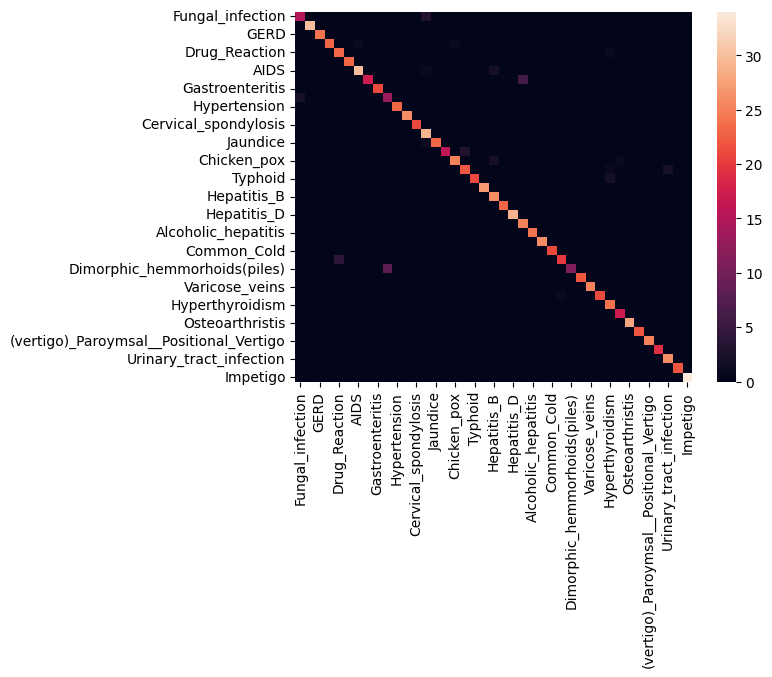

In [84]:
conf_mat = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(conf_mat, index=df['Disease'].unique(), columns=df['Disease'].unique())
print("Decision Tree")
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print('F1-score% =', f1_score(y_test, preds, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, preds)*100)
sns.heatmap(df_cm)

###Gaussian Naive Bayes

In [85]:
NB_clf = GaussianNB()
NB_clf.fit(X_train, y_train)

GaussianNB()

In [86]:
accuracy = accuracy_score(y_test, NB_clf.predict(X_test))
precision = precision_score(y_test, NB_clf.predict(X_test), average='macro')
recall = recall_score(y_test, NB_clf.predict(X_test),average='macro')
f1 = f1_score(y_test, NB_clf.predict(X_test), average='macro')

print("Gaussian NB")
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print(accuracy_score(y_test, NB_clf.predict(X_test),normalize=False))
print("Confusion matrix")
conf_matrix=confusion_matrix(y_test,NB_clf.predict(X_test))
print(conf_matrix)

Gaussian NB
Accuracy: 0.8678861788617886
Precision: 0.8794765795368534
Recall: 0.8733242259602846
F1-Score: 0.8628509936790025
854
Confusion matrix
[[15  0  0 ...  0  0  0]
 [ 0 30  0 ...  0  0  0]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 0  5  0 ... 21  0  0]
 [ 0  0  0 ...  0 22  0]
 [ 0  0  0 ...  0  0 33]]


In [87]:
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)

# Specify the number of folds for cross-validation
num_folds = 10  # You can choose any number of folds you prefer

# Create a K-Fold cross-validation object
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation and compute scores using accuracy, precision, recall
scores = cross_val_score(svm_classifier, X, Y, cv=kf, scoring='accuracy')

# Print the cross-validation scores
print(f'Cross-Validation Scores: {scores}')

# Calculate and print the mean and standard deviation of the scores
# High mean accuracy and a relatively low standard deviation in cross-validation scores are good indicators of consistent and reliable model performance across different subsets of the data.
mean_score = scores.mean()
std_deviation = scores.std()
precision = precision_score(y_test, svm_classifier.predict(X_test), average='macro')
recall = recall_score(y_test, svm_classifier.predict(X_test),average='macro')
f1 = f1_score(y_test, svm_classifier.predict(X_test), average='macro')
print(f'Mean Accuracy: {mean_score}')
print(f'Standard Deviation: {std_deviation}')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

Cross-Validation Scores: [0.96544715 0.95934959 0.98373984 0.95121951 0.97764228 0.95528455
 0.96138211 0.97764228 0.95325203 0.96544715]
Mean Accuracy: 0.9650406504065041
Standard Deviation: 0.010670247762932275
Accuracy: 0.8678861788617886
Precision: 0.9602715109189864
Recall: 0.9531639036857543
F1-Score: 0.9531497086298837


##  VI. Severity / Description / Precaution

In [88]:
severityDictionary=dict()
description_list = dict()
precautionDictionary=dict()

def getDescription():
    global description_list
    with open('symptom_Description.csv') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            _description={row[0]:row[1]}
            description_list.update(_description)




def getSeverityDict():
    global severityDictionary
    with open('Symptom-severity.csv') as csv_file:

        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        try:
            for row in csv_reader:
                _diction={row[0]:int(row[1])}
                severityDictionary.update(_diction)
        except:
            pass


def getprecautionDict():
    global precautionDictionary
    with open('symptom_precaution.csv') as csv_file:

        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            _prec={row[0]:[row[1],row[2],row[3],row[4]]}
            precautionDictionary.update(_prec)


In [89]:
getSeverityDict()
getprecautionDict()
getDescription()

In [90]:
description_list

{'Drug Reaction': 'An adverse drug reaction (ADR) is an injury caused by taking medication. ADRs may occur following a single dose or prolonged administration of a drug or result from the combination of two or more drugs.',
 'Malaria': 'An infectious disease caused by protozoan parasites from the Plasmodium family that can be transmitted by the bite of the Anopheles mosquito or by a contaminated needle or transfusion. Falciparum malaria is the most deadly type.',
 'Allergy': "An allergy is an immune system response to a foreign substance that's not typically harmful to your body.They can include certain foods, pollen, or pet dander. Your immune system's job is to keep you healthy by fighting harmful pathogens.",
 'Hypothyroidism': 'Hypothyroidism, also called underactive thyroid or low thyroid, is a disorder of the endocrine system in which the thyroid gland does not produce enough thyroid hormone.',
 'Psoriasis': "Psoriasis is a common skin disorder that forms thick, red, bumpy patche

In [91]:
severityDictionary

{}

In [92]:
def calc_condition(exp,days):
    sum=0
    for item in exp:
        if item in severityDictionary.keys():
            sum=sum+severityDictionary[item]
    if((sum*days)/(len(exp))>13):
        return 1
        print("You should take the consultation from doctor.")
    else:
        return 0
        print("It might not be that bad but you should take precautions.")


# Chat

In [93]:
def getInfo():
    # name=input("Name:")
    print("Your Name \n")
    name=input("")
    print("Hello,",name)
    return str(name)

In [94]:
def related_sym(psym1):
    if len(psym1)==1:
        return psym1[0]
    print("Searches related to input: ")
    for num,it in enumerate(psym1):
        print(num,")",clean_symp(it))
    if num!=0:
        print(f"Select the one you meant (0 - {num}):  ", end="")
        conf_inp = int(input(""))
    else:
        conf_inp=0

    disease_input=psym1[conf_inp]
    return disease_input

In [95]:
def main_sp(name,all_symp_col):
    #main Idea: At least two initial sympts to start with

    #get the 1st syp -> process it -> check_pattern -> get the appropriate one (if check_pattern==1 == similar syntaxic symp found)
    print("Enter the main symptom you are experiencing Mr/Ms "+name+"  \n\t\t\t\t\t\t",end="=>")
    sym1 = input("")
    sym1=preprocess_sym(sym1)
    sim1,psym1=syntactic_similarity(sym1,all_symp_pr)
    if sim1==1:
        psym1=related_sym(psym1)

    #get the 2nd syp -> process it -> check_pattern -> get the appropriate one (if check_pattern==1 == similar syntaxic symp found)

    print("Enter a second symptom you are experiencing Mr/Ms "+name+"  \n\t\t\t\t\t\t",end="=>")
    sym2=input("")
    sym2=preprocess_sym(sym2)
    sim2,psym2=syntactic_similarity(sym2,all_symp_pr)
    if sim2==1:
        psym2=related_sym(psym2)

    #if check_pattern==0 no similar syntaxic symp1 or symp2 ->> try semantic similarity

    if sim1==0 or sim2==0:
        sim1,psym1=semantic_similarity(sym1,all_symp_pr)
        sim2,psym2=semantic_similarity(sym2,all_symp_pr)

        #if semantic sim syp1 ==0 (no symp found) ->> suggest possible data symptoms based on all data and input sym synonymes
        if sim1==0:
            sugg=suggest_syn(sym1)
            print('Are you experiencing any ')
            for res in sugg:
                print(res)
                inp=input('')
                if inp=="yes":
                    psym1=res
                    sim1=1
                    break

        #if semantic sim syp2 ==0 (no symp found) ->> suggest possible data symptoms based on all data and input sym synonymes
        if sim2==0:
            sugg=suggest_syn(sym2)
            for res in sugg:
                inp=input('Do you feel '+ res+" ?(yes or no) ")
                if inp=="yes":
                    psym2=res
                    sim2=1
                    break
        #if no syntaxic semantic and suggested sym found return None and ask for clarification

        if sim1==0 and sim2==0:
            return None,None
        else:
            # if at least one sym found ->> duplicate it and proceed
            if sim1==0:
                psym1=psym2
            if sim2==0:
                psym2=psym1
    #create patient symp list
    all_sym=[col_dict[psym1],col_dict[psym2]]
    #predict possible diseases
    diseases=possible_diseases(all_sym)
    stop=False
    print("Are you experiencing any ")
    for dis in diseases:
        print(diseases)
        if stop==False:
            for sym in symVONdisease(df_tr,dis):
                if sym not in all_sym:
                    print(clean_symp(sym)+' ?')
                    while True:
                        inp=input("")
                        if(inp=="yes" or inp=="no"):
                            break
                        else:
                            print("Please provide proper answers i.e. (yes/no) : ",end="")
                    if inp=="yes":
                        all_sym.append(sym)
                        diseases=possible_diseases(all_sym)
                        if len(diseases)==1:
                            stop=True
    return knn_clf.predict(OHV(all_sym,all_symp_col)),all_sym

In [96]:
def chat_sp():
    a=True
    while a:
        name=getInfo()
        result,sym=main_sp(name,all_symp_col)
        if result == None :
            ans3=input("Can you specify more what you feel? You can type q to stop the conversation.")
            if ans3=="q":
                a=False
            else:
                continue

        else:
            print("You may have "+result[0])
            print(description_list[result[0]])
            an=input("How many days do you feel those symptoms?")
            if calc_condition(sym,int(an))==1:
                print("You should consult with a doctor.")
            else :
                print('Take following precautions:')
                for e in precautionDictionary[result[0]]:
                    print(e)
            print("Do you need another medical consultation (yes or no)?")
            ans=input()
            if ans!="yes":
                a=False
                print("Thank you for using Robo Doc!")

In [97]:
df_tr.iloc[-1]

itching                        0
skin_rash                      1
nodal_skin_eruptions           0
continuous_sneezing            0
shivering                      0
                          ...   
inflammatory_nails             0
blister                        1
red_sore_around_nose           1
yellow_crust_ooze              1
prognosis               Impetigo
Name: 4919, Length: 133, dtype: object

In [98]:
import joblib
knn_clf=joblib.load('knn.pkl')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator KNeighborsClassifier from version 0.24.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [99]:
symVONdisease(df_tr,"Jaundice")

['itching',
 'vomiting',
 'fatigue',
 'weight_loss',
 'high_fever',
 'yellowish_skin',
 'dark_urine',
 'abdominal_pain']

In [100]:
knn_clf.predict(OHV(['fatigue', 'weight_loss', 'itching','high_fever'],all_symp_col))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


array(['Jaundice'], dtype=object)

In [101]:
d=df_tr[df_tr.iloc[:,-1]=="Fungal infection"].sum(axis=0)

In [102]:
cl=df_tr.columns

In [103]:
pp=d!=0

In [104]:
cl[pp]

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'dischromic _patches',
       'prognosis'],
      dtype='object')

In [105]:
d[pp].drop('prognosis')

itching                 108
skin_rash               108
nodal_skin_eruptions    108
dischromic _patches     108
dtype: object

In [106]:
chat_sp()

Your Name 

Angela
Hello, Angela
Enter the main symptom you are experiencing Mr/Ms Angela  
						=>Fever
Searches related to input: 
0 ) mild fever
1 ) high fever
Select the one you meant (0 - 1):  1
Enter a second symptom you are experiencing Mr/Ms Angela  
						=>Cold


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Are you experiencing any 
You may have AIDS
Acquired immunodeficiency syndrome (AIDS) is a chronic, potentially life-threatening condition caused by the human immunodeficiency virus (HIV). By damaging your immune system, HIV interferes with your body's ability to fight infection and disease.
How many days do you feel those symptoms?2
Take following precautions:
avoid open cuts
wear ppe if possible
consult doctor
follow up
Do you need another medical consultation (yes or no)?
no
Thank you for using Robo Doc!


In [107]:
df_severity = pd.read_csv('symptom_precaution.csv')
df_severity.head()


,Drug Reaction,stop irritation,consult nearest hospital,stop taking drug,follow up
0,Malaria,Consult nearest hospital,avoid oily food,avoid non veg food,keep mosquitos out
1,Allergy,apply calamine,cover area with bandage,NaN,use ice to compress itching
2,Hypothyroidism,reduce stress,exercise,eat healthy,get proper sleep
3,Psoriasis,wash hands with warm soapy water,stop bleeding using pressure,consult doctor,salt baths
4,GERD,avoid fatty spicy food,avoid lying down after eating,maintain healthy weight,exercise
